In [6]:
import pandas as pd 
import numpy as np
import os
import joblib
from ydata_profiling import ProfileReport
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, matthews_corrcoef
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [7]:
output_directory = 'D:/Informatyka i ekonometria/praca magisterska/expresso_churn/output/'
path = 'D:/Informatyka i ekonometria/praca magisterska/expresso_churn/input/'
os.chdir(path)


In [8]:
X_train = pd.read_csv('X_train_after_transformations.csv')
X_test = pd.read_csv('X_test_after_transformations.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [18]:
X_res = pd.read_csv('X_res.csv')
y_res = pd.read_csv('y_res.csv')

In [19]:
features_with_mullticolinearity = ['MONTANT_log',
 'MONTANT_power',
 'MONTANT_sqrt',
 'MONTANT_pow_2',
 'FREQUENCE_RECH_log',
 'FREQUENCE_RECH_power',
 'FREQUENCE_RECH_sqrt',
 'FREQUENCE_RECH_pow_2',
 'REVENUE_log',
 'REVENUE_pow_2',
 'ARPU_SEGMENT_log',
 'ARPU_SEGMENT_power',
 'ARPU_SEGMENT_sqrt',
 'ARPU_SEGMENT_pow_2',
 'FREQUENCE_log',
 'FREQUENCE_power',
 'FREQUENCE_sqrt',
 'FREQUENCE_pow_2',
 'DATA_VOLUME_log',
 'DATA_VOLUME_power',
 'ON_NET_log',
 'ON_NET_power',
 'ON_NET_sqrt',
 'ON_NET_pow_2',
 'ORANGE_log',
 'ORANGE_power',
 'ORANGE_sqrt',
 'ORANGE_pow_2',
 'TIGO_log',
 'TIGO_power',
 'TIGO_sqrt',
 'ZONE1_power',
 'ZONE1_sqrt',
 'ZONE1_pow_2',
 'ZONE2_log',
 'ZONE2_power',
 'ZONE2_sqrt',
 'ZONE2_pow_2',
 'REGULARITY_log',
 'REGULARITY_power',
 'REGULARITY_sqrt',
 'REGULARITY_pow_2',
 'FREQ_TOP_PACK_sqrt',
 'FREQ_TOP_PACK_pow_2',
 'MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'REGULARITY',
 'FREQ_TOP_PACK',
 'TOP_PACK_200=Unlimited1Day',
 'TOP_PACK_All-net 1000=5000;5d',
 'TOP_PACK_All-net 1000F=(3000F On+3000F Off);5d',
 'TOP_PACK_All-net 300=600;2d',
 'TOP_PACK_All-net 5000= 20000off+20000on;30d',
 'TOP_PACK_All-net 500F =2000F_AllNet_Unlimited',
 'TOP_PACK_All-net 500F=1250F_AllNet_1250_Onnet;48h',
 'TOP_PACK_All-net 500F=2000F;5d',
 'TOP_PACK_All-net 600F= 3000F ;5d',
 'TOP_PACK_CVM_on-net bundle 500=5000',
 'TOP_PACK_Data: 100 F=40MB,24H',
 'TOP_PACK_Data: 200 F=100MB,24H',
 'TOP_PACK_Data: 490F=Night,00H-08H',
 'TOP_PACK_Data:1000F=2GB,30d',
 'TOP_PACK_Data:1000F=5GB,7d',
 'TOP_PACK_Data:1500F=3GB,30D',
 'TOP_PACK_Data:1500F=SPPackage1,30d',
 'TOP_PACK_Data:150F=SPPackage1,24H',
 'TOP_PACK_Data:200F=Unlimited,24H',
 'TOP_PACK_Data:3000F=10GB,30d',
 'TOP_PACK_Data:300F=100MB,2d',
 'TOP_PACK_Data:30Go_V 30_Days',
 'TOP_PACK_Data:490F=1GB,7d',
 'TOP_PACK_Data:500F=2GB,24H',
 'TOP_PACK_Data:50F=30MB_24H',
 'TOP_PACK_Data:700F=1.5GB,7d',
 'TOP_PACK_Data:DailyCycle_Pilot_1.5GB',
 'TOP_PACK_DataPack_Incoming',
 'TOP_PACK_EVC_500=2000F',
 'TOP_PACK_FNF2 ( JAPPANTE)',
 'TOP_PACK_Facebook_MIX_2D',
 'TOP_PACK_IVR Echat_Daily_50F',
 'TOP_PACK_Internat: 1000F_Zone_1;24H\t\t',
 'TOP_PACK_Jokko_Daily',
 'TOP_PACK_Jokko_Monthly',
 'TOP_PACK_Jokko_Weekly',
 'TOP_PACK_Jokko_promo',
 'TOP_PACK_MIXT: 200mnoff net _unl on net _5Go;30d',
 'TOP_PACK_MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
 'TOP_PACK_MIXT: 500F=75(SMS, ONNET, Mo)_1000FAllNet;24h\t\t',
 'TOP_PACK_MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t',
 'TOP_PACK_MIXT:10000F=10hAllnet_3Go_1h_Zone3;30d\t\t',
 'TOP_PACK_MIXT:1000F=4250 Off net _ 4250F On net _100Mo; 5d',
 'TOP_PACK_MIXT:500F= 2500F on net _2500F off net;2d',
 'TOP_PACK_MROMO_TIMWES_OneDAY',
 'TOP_PACK_MROMO_TIMWES_RENEW',
 'TOP_PACK_Mixt 250F=Unlimited_call24H',
 'TOP_PACK_New_YAKALMA_4_ALL',
 'TOP_PACK_On net 200F= 3000F_10Mo ;24H',
 'TOP_PACK_On net 200F=Unlimited _call24H',
 'TOP_PACK_On-net 1000F=10MilF;10d',
 'TOP_PACK_On-net 2000f_One_Month_100H; 30d',
 'TOP_PACK_On-net 200F=60mn;1d',
 'TOP_PACK_On-net 300F=1800F;3d',
 'TOP_PACK_On-net 500=4000,10d',
 'TOP_PACK_On-net 500F_FNF;3d',
 'TOP_PACK_Pilot_Youth1_290',
 'TOP_PACK_Pilot_Youth4_490',
 'TOP_PACK_SUPERMAGIK_1000',
 'TOP_PACK_SUPERMAGIK_5000',
 'TOP_PACK_Twter_U2opia_Daily',
 'TOP_PACK_Twter_U2opia_Monthly',
 'TOP_PACK_Twter_U2opia_Weekly',
 'TOP_PACK_VAS(IVR_Radio_Daily)',
 'TOP_PACK_WIFI_Family_2MBPS',
 'TOP_PACK_YMGX 100=1 hour FNF, 24H/1 month',
 'TOP_PACK_Yewouleen_PKG',
 'TENURE_F 9-12 month',
 'TENURE_G 12-15 month',
 'TENURE_H 15-18 month',
 'TENURE_I 18-21 month',
 'TENURE_J 21-24 month',
 'TENURE_K > 24 month']

In [26]:
features_with_mullticolinearity

['MONTANT_log',
 'MONTANT_power',
 'MONTANT_sqrt',
 'MONTANT_pow_2',
 'FREQUENCE_RECH_log',
 'FREQUENCE_RECH_power',
 'FREQUENCE_RECH_sqrt',
 'FREQUENCE_RECH_pow_2',
 'REVENUE_log',
 'REVENUE_pow_2',
 'ARPU_SEGMENT_log',
 'ARPU_SEGMENT_power',
 'ARPU_SEGMENT_sqrt',
 'ARPU_SEGMENT_pow_2',
 'FREQUENCE_log',
 'FREQUENCE_power',
 'FREQUENCE_sqrt',
 'FREQUENCE_pow_2',
 'DATA_VOLUME_log',
 'DATA_VOLUME_power',
 'ON_NET_log',
 'ON_NET_power',
 'ON_NET_sqrt',
 'ON_NET_pow_2',
 'ORANGE_log',
 'ORANGE_power',
 'ORANGE_sqrt',
 'ORANGE_pow_2',
 'TIGO_log',
 'TIGO_power',
 'TIGO_sqrt',
 'ZONE1_power',
 'ZONE1_sqrt',
 'ZONE1_pow_2',
 'ZONE2_log',
 'ZONE2_power',
 'ZONE2_sqrt',
 'ZONE2_pow_2',
 'REGULARITY_log',
 'REGULARITY_power',
 'REGULARITY_sqrt',
 'REGULARITY_pow_2',
 'FREQ_TOP_PACK_sqrt',
 'FREQ_TOP_PACK_pow_2',
 'MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'REGULARITY',
 'FREQ_TOP_PACK',
 'TOP_PACK_200=Unlimited1Day',

In [27]:
features_lr = list(np.setdiff1d(list(X_train.columns),features_with_mullticolinearity))
features_lr.append('REGULARITY')

In [28]:
X_train_lr = X_train[features_lr]
X_test_lr = X_test[features_lr]

In [29]:
X_train

,MONTANT_log,MONTANT_power,MONTANT_sqrt,MONTANT_pow_2,FREQUENCE_RECH_log,FREQUENCE_RECH_power,FREQUENCE_RECH_sqrt,FREQUENCE_RECH_pow_2,REVENUE_log,REVENUE_power,...,TOP_PACK_pilot_offer5,TOP_PACK_pilot_offer6,TOP_PACK_pilot_offer7,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,1.059385,0.604361,0.961584,0.972931,0.591166,0.656816,-1.019764,-1.166528,-2.835094,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
1,0.578410,0.604361,0.540071,0.544933,0.591166,0.603681,-1.811698,0.627623,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
2,0.635602,-0.056361,0.654451,0.660932,0.593271,0.841211,-0.684900,1.024852,-1.670303,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
3,-0.943835,-0.480061,-0.680019,-0.693261,0.591166,0.603681,-1.233251,-1.356661,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
4,0.578410,0.964511,0.540071,0.544933,0.934521,0.603681,-0.868292,-0.096992,-0.505512,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723233,0.109798,-0.056361,0.165867,0.165272,-0.314187,-2.026045,0.117258,-0.117721,0.839413,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
1723234,0.578410,0.604361,0.540071,0.544933,0.591166,0.603681,0.787729,0.627623,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
1723235,-0.031060,0.117111,0.086834,0.084809,0.593271,0.603681,-0.422168,0.363440,-1.128706,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
1723236,0.578410,0.604361,-4.448027,-4.401844,-2.315440,0.603681,0.787729,0.627623,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609


In [39]:
models_load = {'svm_model_res': [],
    'lr_model': [],
          'dc_model': [],
          'rfr_model': [],
          'XGB_model': [],
          'lasso_model': [],
         # 'svm_model': [],
          'lr_model_res': [],
          'dc_model_res': [],
          'rfr_model_res': [],
          'XGB_model_res': [],
          'lasso_model_res': [],
         }

In [40]:
for key in models_load.keys():
    model_name = str(key + '.pkl')
    models_load[key] = joblib.load(model_name)

In [32]:
models_train_AUC = {'lr_model': [],
          'dc_model': [],
          'rfr_model': [],
          'XGB_model': [],
          'lasso_model': [],
          'lr_model_res': [],
          'dc_model_res': [],
          'rfr_model_res': [],
          'XGB_model_res': [],
          'lasso_model_res': [],
          'svm_model': [],
          'svm_model_res': []
         }
models_test_AUC = {'lr_model': [],
          'dc_model': [],
          'rfr_model': [],
          'XGB_model': [],
          'lasso_model': [],
         'lr_model_res': [],
          'dc_model_res': [],
          'rfr_model_res': [],
          'XGB_model_res': [],
          'lasso_model_res': [],
          'svm_model': [],
          'svm_model_res': []
         }

models_proba_test = {
         'lr_model': [],
         'lr_model_res': [],
          'dc_model': [],
          'dc_model_res': [],
          'rfr_model': [],
          'rfr_model_res': [],
          'XGB_model': [],
          'XGB_model_res': [],
          'lasso_model': [],
          'lasso_model_res': [],
         'svm_model': [],
         'svm_model_res': []
         }
models_proba_train = {
         'lr_model': [],
         'lr_model_res': [],
          'dc_model': [],
          'dc_model_res': [],
          'rfr_model': [],
          'rfr_model_res': [],
          'XGB_model': [],
          'XGB_model_res': [],
          'lasso_model': [],
          'lasso_model_res': [],
         'svm_model': [],
         'svm_model_res': []
         }

In [33]:
X_train_res_lr =  X_res[features_lr]


In [45]:
models_proba_train

{'lr_model': array([0.00228522, 0.24689464, 0.00204704, ..., 0.02814132, 0.6056439 ,
        0.00354812]),
 'lr_model_res': array([0.01579126, 0.59892002, 0.01429957, ..., 0.85952404, 0.85952404,
        0.40012087]),
 'dc_model': array([0.00500962, 0.27731449, 0.00500962, ..., 0.01920393, 0.73503244,
        0.00500962]),
 'dc_model_res': array([0.        , 0.73333333, 0.        , ..., 0.        , 0.94878706,
        0.        ]),
 'rfr_model': array([0.04416072, 0.14397368, 0.05556047, ..., 0.03903638, 0.46875386,
        0.12525234]),
 'rfr_model_res': array([0.        , 0.73383472, 0.01      , ..., 0.        , 0.94914804,
        0.        ]),
 'XGB_model': array([0.01126291, 0.23091896, 0.00486433, ..., 0.02853603, 0.70839256,
        0.01964727], dtype=float32),
 'XGB_model_res': array([0.03260226, 0.54672056, 0.02536263, ..., 0.12302046, 0.908767  ,
        0.06079352], dtype=float32),
 'lasso_model': array([0.01741935, 0.20171306, 0.01859276, ..., 0.05050944, 0.6877095 ,
      

In [34]:
y_train

,CHURN
0,0
1,1
2,0
3,0
4,0
...,...
1723233,0
1723234,1
1723235,0
1723236,1


In [35]:
X_train_res_lr

,DATA_VOLUME_pow_2,DATA_VOLUME_sqrt,FREQ_TOP_PACK_log,FREQ_TOP_PACK_power,REGION_DIOURBEL,REGION_FATICK,REGION_KAFFRINE,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,...,"TOP_PACK_YMGX on-net 100=700F, 24H",TOP_PACK_pack_chinguitel_24h,TOP_PACK_pilot_offer4,TOP_PACK_pilot_offer5,TOP_PACK_pilot_offer6,TOP_PACK_pilot_offer7,ZONE1,ZONE1_log,ZONE2,REGULARITY
0,0.0,0.0,-3.126388e-13,-1.207923e-13,-0.178857,-0.129552,-0.143987,-0.217275,-0.021632,-0.135541,...,-0.000762,-0.001524,-0.000762,-0.000762,-0.001319,-0.000762,-3.197442e-14,9.325873e-15,4.440892e-15,1.433982
1,0.0,0.0,-3.126388e-13,-1.207923e-13,-0.178857,-0.129552,-0.143987,-0.217275,-0.021632,-0.135541,...,-0.000762,-0.001524,-0.000762,-0.000762,-0.001319,-0.000762,-3.197442e-14,9.325873e-15,4.440892e-15,-0.585189
2,0.0,0.0,-3.126388e-13,-1.207923e-13,-0.178857,-0.129552,-0.143987,-0.217275,-0.021632,-0.135541,...,-0.000762,-0.001524,-0.000762,-0.000762,-0.001319,-0.000762,-3.197442e-14,9.325873e-15,4.440892e-15,1.478853
3,0.0,0.0,-3.126388e-13,-1.207923e-13,-0.178857,-0.129552,-0.143987,-0.217275,-0.021632,-0.135541,...,-0.000762,-0.001524,-0.000762,-0.000762,-0.001319,-0.000762,-3.197442e-14,9.325873e-15,4.440892e-15,1.299371
4,0.0,0.0,-3.126388e-13,-1.207923e-13,-0.178857,-0.129552,-0.143987,-0.217275,-0.021632,-0.135541,...,-0.000762,-0.001524,-0.000762,-0.000762,-0.001319,-0.000762,-3.197442e-14,9.325873e-15,4.440892e-15,0.581443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799365,0.0,0.0,-3.126388e-13,-1.207923e-13,-0.178857,-0.129552,-0.143987,-0.217275,-0.021632,-0.135541,...,-0.000762,-0.001524,-0.000762,-0.000762,-0.001319,-0.000762,-3.197442e-14,9.325873e-15,4.440892e-15,-0.854412
2799366,0.0,0.0,-3.126388e-13,-1.207923e-13,-0.178857,-0.129552,-0.143987,-0.217275,-0.021632,-0.135541,...,-0.000762,-0.001524,-0.000762,-0.000762,-0.001319,-0.000762,-3.197442e-14,9.325873e-15,4.440892e-15,-1.213376
2799367,0.0,0.0,-3.126388e-13,-1.207923e-13,-0.178857,-0.129552,-0.143987,-0.217275,-0.021632,-0.135541,...,-0.000762,-0.001524,-0.000762,-0.000762,-0.001319,-0.000762,-3.197442e-14,9.325873e-15,4.440892e-15,-1.213376
2799368,0.0,0.0,-3.126388e-13,-1.207923e-13,-0.178857,-0.129552,-0.143987,-0.217275,-0.021632,-0.135541,...,-0.000762,-0.001524,-0.000762,-0.000762,-0.001319,-0.000762,-3.197442e-14,9.325873e-15,4.440892e-15,-1.213376


In [41]:
for key in models_load.keys():
    if key == 'lr_model':
        lr_model = LogisticRegression(max_iter = 1000)
        lr_model.fit(X_train_lr, y_train)
        models_proba_test[key] = lr_model.predict_proba(X_test_lr)[:, 1]
        models_test_AUC[key] = roc_auc_score(y_test, models_proba_test[key])
        print(f'AUC {key} on train set: {models_test_AUC[key]}')
        models_proba_train[key] = lr_model.predict_proba(X_train_lr)[:, 1]
        models_train_AUC[key] = roc_auc_score(y_train, models_proba_train[key])
        print(f'AUC {key} on train set: {models_train_AUC[key]}')
    elif key =='lr_model_res':
        lr_model_res = LogisticRegression(max_iter = 1000)
        lr_model_res.fit(X_train_res_lr, y_res)
        models_proba_test[key] = lr_model_res.predict_proba(X_test_lr)[:, 1]
        models_test_AUC[key] = roc_auc_score(y_test, models_proba_test[key])
        print(f'AUC {key} on train set: {models_test_AUC[key]}')
        models_proba_train[key] = lr_model_res.predict_proba(X_train_res_lr)[:, 1]
        models_train_AUC[key] = roc_auc_score(y_res, models_proba_train[key])
        print(f'AUC {key} on train set: {models_train_AUC[key]}')
    else:
        models_proba_test[key] = models_load[key].predict_proba(X_test)[:, 1]
        models_test_AUC[key] = roc_auc_score(y_test, models_proba_test[key])
        print(f'AUC {key} on test set: {models_test_AUC[key]}')
        models_proba_train[key] = models_load[key].predict_proba(X_train)[:, 1]
        models_train_AUC[key] = roc_auc_score(y_train, models_proba_train[key])
        print(f'AUC {key} on train set: {models_train_AUC[key]}')
    


AUC svm_model_res on test set: 0.8960732884945701
AUC svm_model_res on train set: 0.8965349047159376


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC lr_model on train set: 0.9079727519238543
AUC lr_model on train set: 0.908684440426579
AUC dc_model on test set: 0.898070524307061
AUC dc_model on train set: 0.8984563854708498
AUC rfr_model on test set: 0.8790021628498745
AUC rfr_model on train set: 0.879097184788671
AUC XGB_model on test set: 0.9157910472733433
AUC XGB_model on train set: 0.9163219823828934
AUC lasso_model on test set: 0.9142822543114141
AUC lasso_model on train set: 0.9146976616490379


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC lr_model_res on train set: 0.9081453728656348
AUC lr_model_res on train set: 0.9096894862275069
AUC dc_model_res on test set: 0.8381878740989545
AUC dc_model_res on train set: 0.9650620334691826
AUC rfr_model_res on test set: 0.9028327318917841
AUC rfr_model_res on train set: 0.9510486881111508
AUC XGB_model_res on test set: 0.9141565798585589
AUC XGB_model_res on train set: 0.9144539866777991
AUC lasso_model_res on test set: 0.914708578030113
AUC lasso_model_res on train set: 0.915211675768176


In [60]:


key = 'svm_model' 

model_name = str(key + '.pkl')
models_load[key] = joblib.load(model_name)


print(models_load)

{'svm_model_res': SVC(kernel='linear', probability=True), 'lr_model': LogisticRegression(max_iter=1000), 'dc_model': DecisionTreeClassifier(max_depth=5, min_samples_leaf=2), 'rfr_model': RandomForestClassifier(max_depth=2, min_samples_leaf=2), 'XGB_model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0.0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...), 'lasso_m

In [51]:
train_x = X_train.values
test_x = X_test.values
test_x

array([[ 0.27175044,  0.65869808,  0.43443275, ..., -0.14642048,
        -0.07692424,  0.2326087 ],
       [ 0.75130065,  1.13798232,  0.74324746, ..., -0.14642048,
        -0.07692424, -4.29906527],
       [ 0.57840955,  0.6043606 ,  0.54007077, ..., -0.14642048,
        -0.07692424,  0.2326087 ],
       ...,
       [-3.52039163, -2.09810444, -2.75762   , ..., -0.14642048,
        -0.07692424,  0.2326087 ],
       [ 0.57840955,  0.6043606 ,  0.54007077, ..., -0.14642048,
        -0.07692424,  0.2326087 ],
       [ 0.57840955,  0.6043606 ,  0.54007077, ..., -0.14642048,
        -0.07692424,  0.2326087 ]])

In [61]:
train_x = X_train.values
test_x = X_test.values
key = 'svm_model'
models_proba_test[key] = models_load[key].predict_proba(test_x)[:, 1]
models_test_AUC[key] = roc_auc_score(y_test, models_proba_test[key])
print(f'AUC {key} on test set: {models_test_AUC[key]}')
models_proba_train[key] = models_load[key].predict_proba(train_x)[:, 1]
models_train_AUC[key] = roc_auc_score(y_train, models_proba_train[key])
print(f'AUC {key} on train set: {models_train_AUC[key]}')

AUC svm_model on test set: 0.8960735964939684
AUC svm_model on train set: 0.8965347464152356


In [62]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

def find_best_threshold(y_true, y_prob):
    fpr, tpr, thresholds_roc = roc_curve(y_true, y_prob)
    precision, recall, thresholds_pr = precision_recall_curve(y_true, y_prob)

    # ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc_score(y_true, y_prob))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # PR curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='r', label='Precision-Recall curve (area = %0.2f)' % auc(recall, precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    # Find the best threshold based on the PR curve
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold_pr = thresholds_pr[np.argmax(f1_scores)]

    return best_threshold_pr

In [63]:
y_prob_rfr = models_load['rfr_model'].predict_proba(X_test)[:, 1]


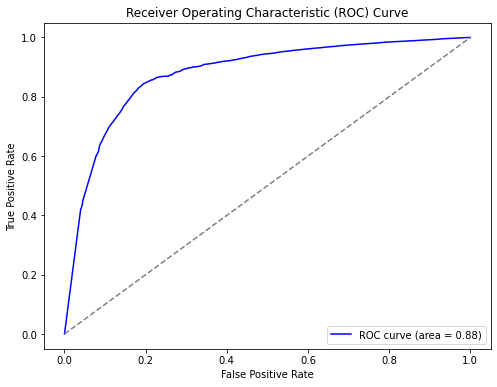

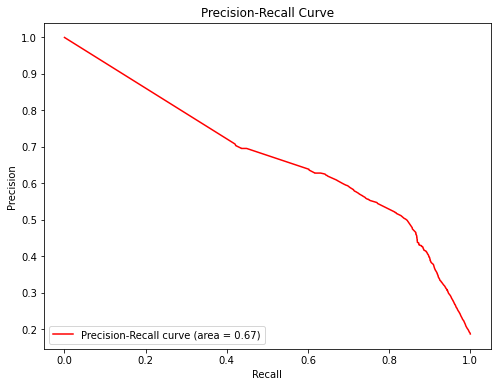

In [64]:
best_threshold = find_best_threshold(y_test, y_prob_rfr)

In [65]:
def calculate_metrics(true_labels, predicted_probs, model_label, best_threshold):
    # Convert probabilities to class labels (0 or 1) based on a threshold of 0.5 
    predicted_labels = [1 if prob >= best_threshold else 0 for prob in predicted_probs]
    
    # Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    
    # Precision
    precision = precision_score(true_labels, predicted_labels)
    
    # Recall (Sensitivity)
    recall = recall_score(true_labels, predicted_labels)
    
    # Confusion matrix to calculate True Negatives for Specificity
    tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
    
    # Specificity (True Negative Rate)
    specificity = tn / (tn + fp)
    
    # F1 Score
    f1 = f1_score(true_labels, predicted_labels)
    
    # AUC
    auc = roc_auc_score(true_labels, predicted_probs)
    
    # MCC
    mcc = matthews_corrcoef(true_labels, predicted_labels)
    metrics_dict = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'specificity': specificity, 'f1': f1, 'auc': auc, 'mcc' : mcc}
    return pd.DataFrame(metrics_dict,index=[model_label])

In [66]:
y_pred = [1 if prob >= best_threshold else 0 for prob in models_proba_test['XGB_model_res']]


In [67]:
cm = confusion_matrix(y_test, y_pred)

In [68]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Wartości prawdziwe')
    plt.xlabel('Wartości przewidziane')
    plt.tight_layout()


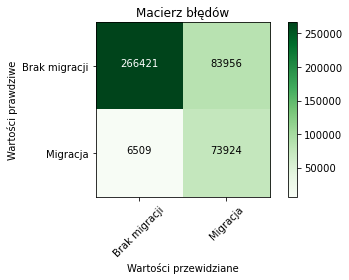

In [69]:
class_labels = ['Brak migracji', 'Migracja']

plt.figure()
plot_confusion_matrix(cm, classes=class_labels, title='Macierz błędów', cmap=plt.cm.Greens)

plt.show()


In [70]:
def confustion_matrix_plot_model_test(models_proba, best_threshold = best_threshold, dict_of_plots = {}):
    for i, key in enumerate(models_proba.keys()):
        y_pred = [1 if prob >= best_threshold else 0 for prob in models_proba[key]]
        if i % 2 == 0: 
            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            cm = confusion_matrix(y_test, y_pred)
            plot_confusion_matrix(cm, classes=class_labels, title=str('Macierz błędów ' + key), cmap=plt.cm.Greens)

        else: 
            plt.subplot(1, 2, 2)
            cm = confusion_matrix(y_test, y_pred)
            plot_confusion_matrix(cm, classes=class_labels, title=str('Macierz błędów ' + key), cmap=plt.cm.Greens)
            plt.savefig(str('Macierz błędów ' + key + '.pdf'),format='pdf')
            plt.show()

        
                      

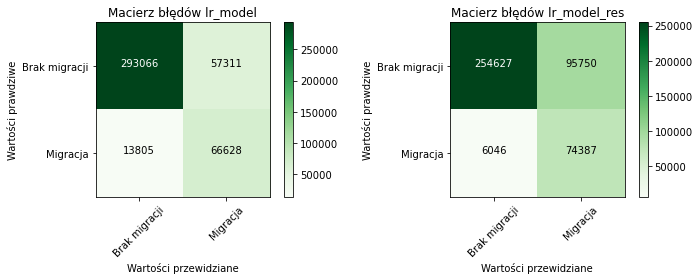

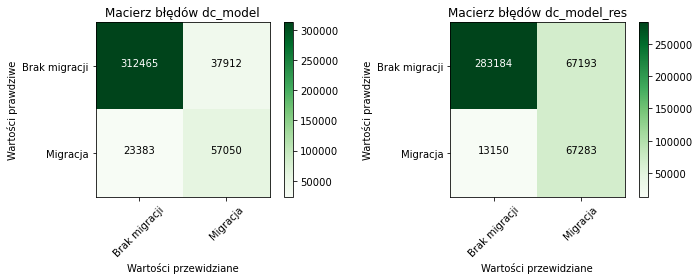

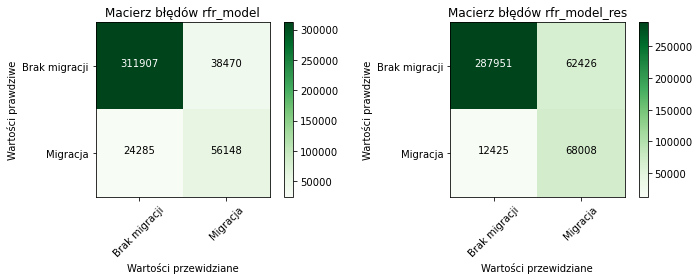

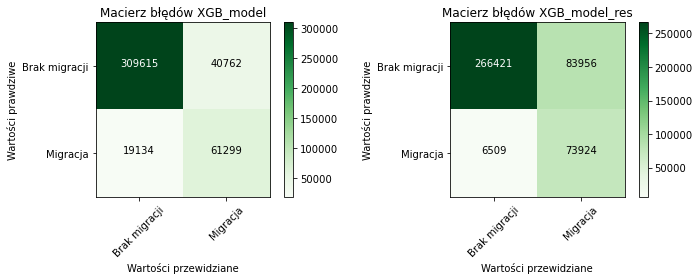

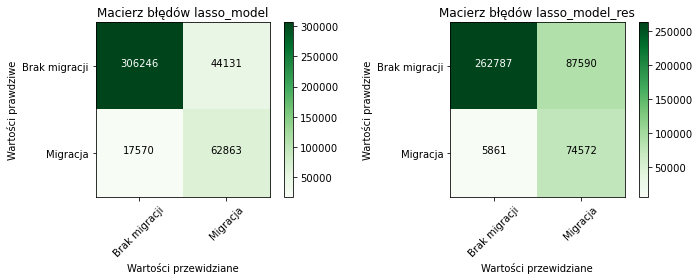

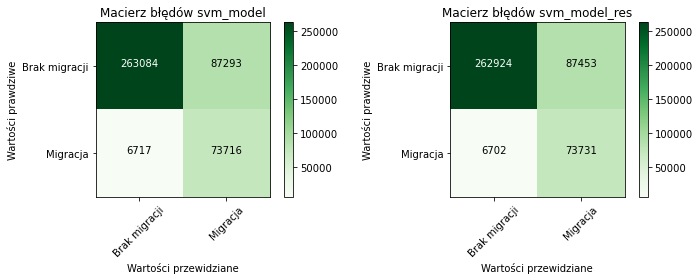

In [71]:
confustion_matrix_plot_model_test(models_proba_test)

In [75]:
models_unbalanced = {'lr_model': [],
          'dc_model': [],
          'rfr_model': [] ,
          'XGB_model': [],
          'lasso_model': [], 
          'svm_model': [],
         }
models_smote = {
          'lr_model_res': [],
          'dc_model_res': [],
          'rfr_model_res': [],
          'XGB_model_res': [],
          'lasso_model_res': [],
          'svm_model_res': [],
}
models_unbalan

In [76]:
for key in models_unbalanced.keys():
    models_unbalanced[key] = models_proba_test[key]
for key in models_smote.keys():
    models_smote[key] = models_proba_test[key]
        
    


{'lr_model_res': array([0.00184912, 0.05100457, 0.01429957, ..., 0.18047784, 0.85952404,
        0.85952404]),
 'dc_model_res': array([0.        , 0.        , 0.        , ..., 0.        , 0.93479933,
        0.93479933]),
 'rfr_model_res': array([0.01      , 0.1       , 0.01      , ..., 0.        , 0.93480925,
        0.93480925]),
 'XGB_model_res': array([0.01151177, 0.126438  , 0.03634139, ..., 0.12303311, 0.91881114,
        0.91881114], dtype=float32),
 'lasso_model_res': array([0.0040759 , 0.12841155, 0.04656421, ..., 0.16594689, 0.9315986 ,
        0.9315986 ]),
 'svm_model_res': array([0.00420916, 0.15616069, 0.12738664, ..., 0.17607499, 0.83637976,
        0.83637976])}

In [79]:
# Create a figure and axis to plot the ROC curve
def roc_curve_models(models, filename):
    plt.figure(figsize=(10, 8))
    plt.title('Receiver Operating Characteristic - Krzywa ROC ')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Iterate through each model's probabilities, calculate ROC curve, and plot it
    for model_name, y_prob in models.items():
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Plot the random guess line (dashed)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

    # Set axis limits and add a legend
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc='lower right')
    filename = str('roc' + filename + '.pdf')
    plt.savefig(output_directory + filename, format='pdf')

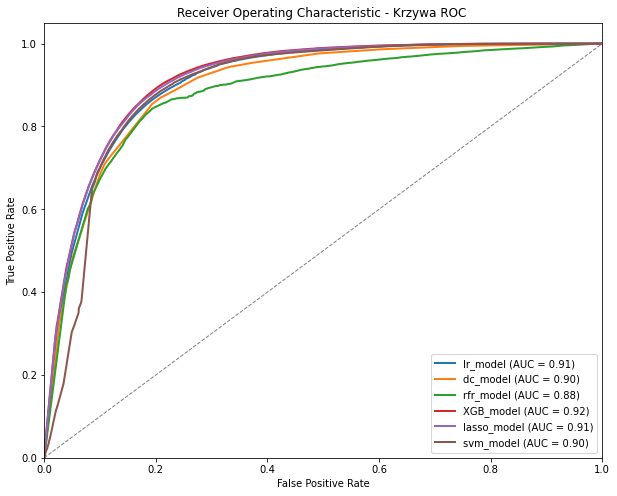

In [80]:
roc_curve_models(models_unbalanced, 'unbalenced')

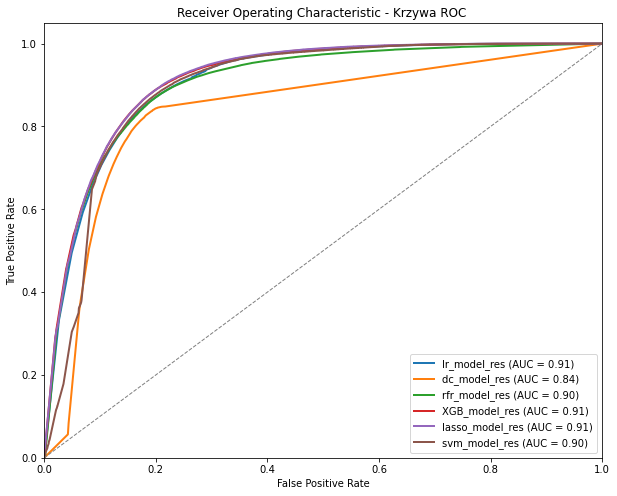

In [81]:
roc_curve_models(models_smote, 'smote')

In [72]:
metrics_df = pd.DataFrame({'accuracy': [], 'precision': [], 'recall': [], 'specificity': [], 'f1': [], 'auc': [], 'mcc' : []})

In [73]:
for model_label, predicted_probs in models_proba_test.items():
    metrics_df = pd.concat([metrics_df, calculate_metrics(y_test, predicted_probs, model_label, best_threshold)])

In [83]:
metrics_df.round(4)

,accuracy,precision,recall,specificity,f1,auc,mcc
lr_model,0.8349,0.5376,0.8284,0.8364,0.6520,0.9080,0.5723
lr_model_res,0.7637,0.4372,0.9248,0.7267,0.5937,0.9081,0.5194
dc_model,0.8577,0.6008,0.7093,0.8918,0.6505,0.8981,0.5650
dc_model_res,0.8135,0.5003,0.8365,0.8082,0.6262,0.8382,0.5422
rfr_model,0.8543,0.5934,0.6981,0.8902,0.6415,0.8790,0.5537
rfr_model_res,0.8263,0.5214,0.8455,0.8218,0.6450,0.9028,0.5660
XGB_model,0.8610,0.6006,0.7621,0.8837,0.6718,0.9158,0.5918
XGB_model_res,0.7900,0.4682,0.9191,0.7604,0.6204,0.9142,0.5495
lasso_model,0.8568,0.5875,0.7816,0.8740,0.6708,0.9143,0.5913
lasso_model_res,0.7831,0.4599,0.9271,0.7500,0.6148,0.9147,0.5446


In [90]:
XGB_model_res = models_load['XGB_model_res']

In [91]:
import shap
shap.initjs()

In [92]:
X_sampled = X_train.sample(100000, random_state=10)

In [93]:
explainer = shap.TreeExplainer(XGB_model_res)
shap_values = explainer.shap_values(X_sampled)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


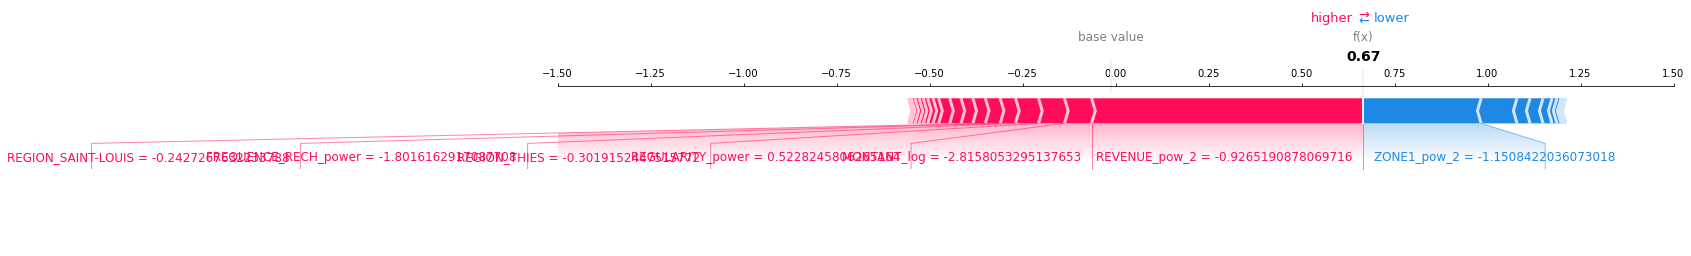

In [105]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled.iloc[0,:],matplotlib=True,show=False)
x_min = -1.5  # Minimum x-axis value
x_max = 1.5   # Maximum x-axis value
plt.xlim(x_min, x_max)
plt.savefig('shap_force_plot.pdf')
plt.show()

In [102]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled.iloc[0,:])

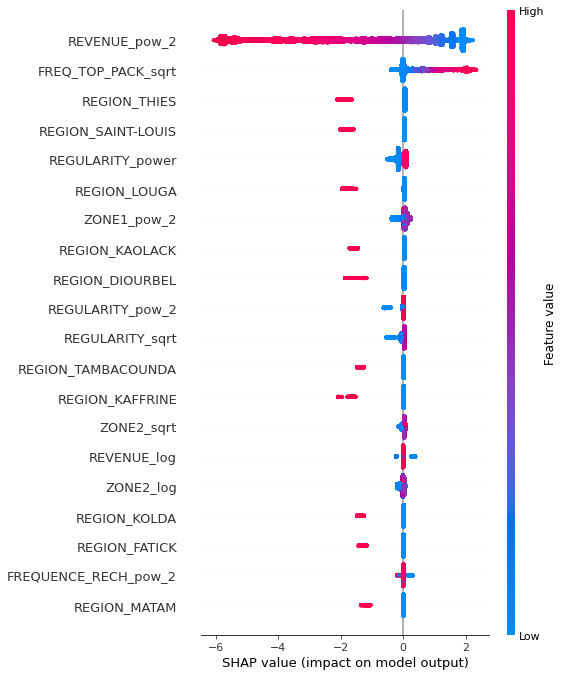

In [107]:
shap.summary_plot(shap_values, X_sampled)


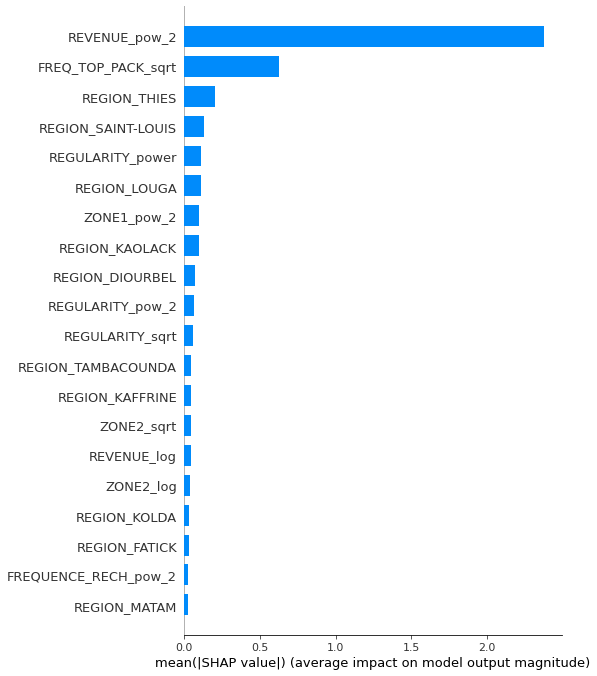

In [108]:
shap.summary_plot(shap_values, X_sampled, plot_type="bar")


 99%|===================| 98977/100000 [01:45<00:01]        

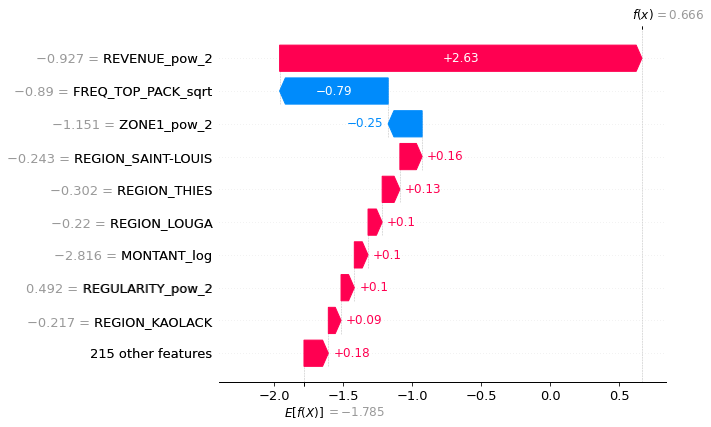

In [109]:
# compute SHAP values
explainer = shap.Explainer(XGB_model_res, X_sampled)
shap_values = explainer(X_sampled)
shap.plots.waterfall(shap_values[0])


In [1]:
import sys
sys.version_info

sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)

In [2]:
jupyter kernelspec list

SyntaxError: invalid syntax (Temp/ipykernel_21244/728349862.py, line 1)

In [3]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [4]:
jupyter --version

NameError: name 'jupyter' is not defined